<img src="https://seeklogo.com/images/U/unb-universidade-de-brasilia-logo-2F07D677C6-seeklogo.com.png">

Universidade Brasília\
Faculdade de Ciências da Saúde\
Departamento de Saúde Coletiva\
Disciplina: Tópicos Especiais em Saúde Coletiva – Bancos de Dados em Saúde\
Professor: Ivan Zimmermann

---



# <font color=87A2FB><b>Caracterização de Nascidos Vivos no estado do Rio de Janeiro em 2019</b>

Maíra Catharina Ramos - 21/0001577

##**Explorando os dados sobre nascidos vivos no RJ em 2019**

In [ ]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Carregando dados de arquivo remoto (Google Drive)
df_sinasc_19_rj = pd.read_csv('https://drive.google.com/uc?export=download&id=10Etb5hUnMhfOAv3CYxQ6E6M1jku0Tl-F')

# Carregando dicionário de dados de arquivo remoto
dicio = pd.read_csv('https://drive.google.com/uc?export=download&id=1WmOoIDCepR5eQzceIHmAg32zWQ-e6cnk')

In [ ]:
df_sinasc_19_rj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207989 entries, 0 to 207988
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CODESTAB    206769 non-null  float64
 1   CODMUNNASC  207989 non-null  int64  
 2   LOCNASC     207989 non-null  int64  
 3   IDADEMAE    207989 non-null  float64
 4   ESTCIVMAE   207989 non-null  int64  
 5   ESCMAE      207989 non-null  int64  
 6   CODOCUPMAE  180992 non-null  float64
 7   QTDFILVIVO  205826 non-null  float64
 8   QTDFILMORT  204300 non-null  float64
 9   CODMUNRES   207989 non-null  int64  
 10  GESTACAO    207989 non-null  int64  
 11  GRAVIDEZ    207989 non-null  int64  
 12  PARTO       207989 non-null  int64  
 13  CONSULTAS   207989 non-null  int64  
 14  DTNASC      207989 non-null  int64  
 15  HORANASC    207857 non-null  float64
 16  SEXO        207989 non-null  int64  
 17  APGAR1      206220 non-null  float64
 18  APGAR5      206351 non-null  float64
 19  RA

In [ ]:
dicio

,id,type,description
0,CODESTAB,text,Código de estabelecimento
1,CODMUNNASC,bigint,"Município de ocorrência, em codificação idênti..."
2,LOCNASC,bigint,"Local de ocorrência do nascimento, conforme a ..."
3,IDADEMAE,bigint,Idade da mãe em anos
4,ESTCIVMAE,bigint,"Estado civil, conforme a tabela:\n1: Solteira\..."
5,ESCMAE,bigint,"Escolaridade, anos de estudo concluídos:\n1: N..."
6,CODOCUPMAE,text,"Ocupação, conforme a Classificação Brasileira ..."
7,QTDFILVIVO,text,Número de filhos vivos
8,QTDFILMORT,text,Número de filhos mortos
9,CODMUNRES,bigint,"Município de residência da mãe, em codificação..."


In [ ]:
df_sinasc_19_rj.head()

,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,ESCMAEAGR1,CODPAISRES,TPROBSON
0,5903394.0,330070,1,19.0,1,4,NaN,0.0,0.0,330070,...,8.0,6.0,4.0,1.0,2.0,3.0,1.0,5.0,1,1.0
1,5903394.0,330070,1,19.0,1,4,999992.0,0.0,0.0,330070,...,1.0,10.0,4.0,1.0,2.0,3.0,1.0,6.0,1,1.0
2,5903394.0,330070,1,25.0,1,3,999992.0,0.0,0.0,330023,...,8.0,6.0,4.0,1.0,2.0,2.0,1.0,3.0,1,1.0
3,5903394.0,330070,1,30.0,2,4,999992.0,1.0,1.0,330070,...,1.0,7.0,3.0,1.0,1.0,3.0,1.0,6.0,1,5.0
4,5903394.0,330070,1,22.0,1,3,999992.0,0.0,0.0,330070,...,8.0,6.0,5.0,1.0,1.0,3.0,1.0,3.0,1,10.0


### Criando novos atributos nas variáveis de interesse do Dataframe df_sinasc_19_rj

In [ ]:
df_sinasc_19_rj['CODMUNNASC'].unique()

CODMUNNASC1={330010:'Angra dos Reis',
330015:'Aperibé',
330020:'Araruama',
330022:'Areal',
330023:'Armação dos Búzios',
330025:'Arraial do Cabo',
330030:'Barra do Piraí',
330040:'Barra Mansa',
330045:'Belford Roxo',
330050:'Bom Jardim',
330060:'Bom Jesus do Itabapoana',
330070:'Cabo Frio',
330080:'Cachoeiras de Macacu',
330090:'Cambuci',
330100:'Campos dos Goytacazes',
330110:'Cantagalo',
330093:'Carapebus',
330115:'Cardoso Moreira',
330120:'Carmo',
330130:'Casimiro de Abreu',
330095:'Comendador Levy Gasparian',
330140:'Conceição de Macabu',
330150:'Cordeiro',
330160:'Duas Barras',
330170:'Duque de Caxias',
330180:'Engenheiro Paulo de Frontin',
330185:'Guapimirim',
330187:'Iguaba Grande',
330190:'Itaboraí',
330200:'Itaguaí',
330205:'Italva',
330210:'Itaocara',
330220:'Itaperuna',
330225:'Itatiaia',
330227:'Japeri',
330230:'Laje do Muriaé',
330240:'Macaé',
330245:'Macuco',
330250:'Magé',
330260:'Mangaratiba',
330270:'Maricá',
330280:'Mendes',
330285:'Mesquita',
330290:'Miguel Pereira',
330300:'Miracema',
330310:'Natividade',
330320:'Nilópolis',
330330:'Niterói',
330340:'Nova Friburgo',
330350:'Nova Iguaçu',
330360:'Paracambi',
330370:'Paraíba do Sul',
330380:'Paraty',
330385:'Paty do Alferes',
330390:'Petrópolis',
330395:'Pinheiral',
330400:'Piraí',
330410:'Porciúncula',
330411:'Porto Real',
330412:'Quatis',
330414:'Queimados',
330415:'Quissamã',
330420:'Resende',
330430:'Rio Bonito',
330440:'Rio Claro',
330450:'Rio das Flores',
330452:'Rio das Ostras',
330455:'Rio de Janeiro',
330460:'Santa Maria Madalena',
330470:'Santo Antônio de Pádua',
330480:'São Fidélis',
330475:'São Francisco de Itabapoana',
330490:'São Gonçalo',
330500:'São João da Barra',
330510:'São João de Meriti',
330513:'São José de Ubá',
330515:'São José do Vale do Rio Preto',
330520:'São Pedro da Aldeia',
330530:'São Sebastião do Alto',
330540:'Sapucaia',
330550:'Saquarema',
330555:'Seropédica',
330560:'Silva Jardim',
330570:'Sumidouro',
330575:'Tanguá',
330580:'Teresópolis',
330590:'Trajano de Moraes',
330600:'Três Rios',
330610:'Valença',
330615:'Varre-Sai',
330620:'Vassouras',
330630:'Volta Redonda',
330000:'Município ignorado - RJ'
}

df_sinasc_19_rj['CODMUNNASC'].map(CODMUNNASC1)


0                  Cabo Frio
1                  Cabo Frio
2                  Cabo Frio
3                  Cabo Frio
4                  Cabo Frio
                 ...        
207984    Armação dos Búzios
207985               Itaguaí
207986              Mesquita
207987    Armação dos Búzios
207988               Itaguaí
Name: CODMUNNASC, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['CODMUNRES'].unique()

CODMUNRES1={330010:'Angra dos Reis',
330015:'Aperibé',
330020:'Araruama',
330022:'Areal',
330023:'Armação dos Búzios',
330025:'Arraial do Cabo',
330030:'Barra do Piraí',
330040:'Barra Mansa',
330045:'Belford Roxo',
330050:'Bom Jardim',
330060:'Bom Jesus do Itabapoana',
330070:'Cabo Frio',
330080:'Cachoeiras de Macacu',
330090:'Cambuci',
330100:'Campos dos Goytacazes',
330110:'Cantagalo',
330093:'Carapebus',
330115:'Cardoso Moreira',
330120:'Carmo',
330130:'Casimiro de Abreu',
330095:'Comendador Levy Gasparian',
330140:'Conceição de Macabu',
330150:'Cordeiro',
330160:'Duas Barras',
330170:'Duque de Caxias',
330180:'Engenheiro Paulo de Frontin',
330185:'Guapimirim',
330187:'Iguaba Grande',
330190:'Itaboraí',
330200:'Itaguaí',
330205:'Italva',
330210:'Itaocara',
330220:'Itaperuna',
330225:'Itatiaia',
330227:'Japeri',
330230:'Laje do Muriaé',
330240:'Macaé',
330245:'Macuco',
330250:'Magé',
330260:'Mangaratiba',
330270:'Maricá',
330280:'Mendes',
330285:'Mesquita',
330290:'Miguel Pereira',
330300:'Miracema',
330310:'Natividade',
330320:'Nilópolis',
330330:'Niterói',
330340:'Nova Friburgo',
330350:'Nova Iguaçu',
330360:'Paracambi',
330370:'Paraíba do Sul',
330380:'Paraty',
330385:'Paty do Alferes',
330390:'Petrópolis',
330395:'Pinheiral',
330400:'Piraí',
330410:'Porciúncula',
330411:'Porto Real',
330412:'Quatis',
330414:'Queimados',
330415:'Quissamã',
330420:'Resende',
330430:'Rio Bonito',
330440:'Rio Claro',
330450:'Rio das Flores',
330452:'Rio das Ostras',
330455:'Rio de Janeiro',
330460:'Santa Maria Madalena',
330470:'Santo Antônio de Pádua',
330480:'São Fidélis',
330475:'São Francisco de Itabapoana',
330490:'São Gonçalo',
330500:'São João da Barra',
330510:'São João de Meriti',
330513:'São José de Ubá',
330515:'São José do Vale do Rio Preto',
330520:'São Pedro da Aldeia',
330530:'São Sebastião do Alto',
330540:'Sapucaia',
330550:'Saquarema',
330555:'Seropédica',
330560:'Silva Jardim',
330570:'Sumidouro',
330575:'Tanguá',
330580:'Teresópolis',
330590:'Trajano de Moraes',
330600:'Três Rios',
330610:'Valença',
330615:'Varre-Sai',
330620:'Vassouras',
330630:'Volta Redonda',
330000:'Município ignorado - RJ'
}

df_sinasc_19_rj['CODMUNRES'].map(CODMUNRES1)


0                  Cabo Frio
1                  Cabo Frio
2         Armação dos Búzios
3                  Cabo Frio
4                  Cabo Frio
                 ...        
207984    Armação dos Búzios
207985               Itaguaí
207986          Belford Roxo
207987    Armação dos Búzios
207988               Itaguaí
Name: CODMUNRES, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['LOCNASC'].unique()

LOCNASC1={9:'Ignorado', 1:'Hospital', 2:'Outro Estab Saúde', 3:'Domicílio', 4:'Outros'}

df_sinasc_19_rj['LOCNASC'].map(LOCNASC1)

0          Hospital
1          Hospital
2          Hospital
3          Hospital
4          Hospital
            ...    
207984     Hospital
207985     Hospital
207986     Hospital
207987     Hospital
207988    Domicílio
Name: LOCNASC, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['ESTCIVMAE'].unique()

ESTCIVMAE1={1:'Solteira', 2:'Casada', 3:'Viuva', 4:'Separado judicialmente/Divorciado', 5:'União consensual', 9: 'Ignorado'}

df_sinasc_19_rj['ESTCIVMAE'].map(ESTCIVMAE1)

0         Solteira
1         Solteira
2         Solteira
3           Casada
4         Solteira
            ...   
207984    Solteira
207985    Solteira
207986    Solteira
207987    Solteira
207988    Solteira
Name: ESTCIVMAE, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['ESCMAE'].unique()

ESCMAE1={1:'Nenhuma', 2:'1 a 3 anos', 3:'4 a 7 anos', 4:'8 a 11 anos', 5:'12 e mais', 9: 'Ignorado'}

df_sinasc_19_rj['ESCMAE'].map(ESCMAE1)

0         8 a 11 anos
1         8 a 11 anos
2          4 a 7 anos
3         8 a 11 anos
4          4 a 7 anos
             ...     
207984     4 a 7 anos
207985    8 a 11 anos
207986    8 a 11 anos
207987     4 a 7 anos
207988    8 a 11 anos
Name: ESCMAE, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['GESTACAO'].unique()

GESTACAO1={9:'Ignorado', 1:'Menos de 22 semanas', 2:'22 a 27 semanas', 3:'28 a 31 semanas', 4:'32 a 36 semanas', 5:'37 a 41 semanas', 6:'42 semanas e mais'}

df_sinasc_19_rj['GESTACAO'].map(GESTACAO1)

0         37 a 41 semanas
1         37 a 41 semanas
2         37 a 41 semanas
3         37 a 41 semanas
4         32 a 36 semanas
               ...       
207984    37 a 41 semanas
207985    37 a 41 semanas
207986    37 a 41 semanas
207987    37 a 41 semanas
207988    37 a 41 semanas
Name: GESTACAO, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['PARTO'].unique()

PARTO1={9:'ignorado/NI', 1:'Vaginal', 2:'Cesáreo'}

df_sinasc_19_rj['PARTO'].map(PARTO1)

0         Vaginal
1         Vaginal
2         Cesáreo
3         Vaginal
4         Vaginal
           ...   
207984    Cesáreo
207985    Cesáreo
207986    Vaginal
207987    Cesáreo
207988    Vaginal
Name: PARTO, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['SEXO'].unique()

SEXO1={0:'Ignorado/NI', 1:'Masculino', 2:'Feminino'}

df_sinasc_19_rj['SEXO'].map(SEXO1)

0         Masculino
1         Masculino
2          Feminino
3         Masculino
4         Masculino
            ...    
207984     Feminino
207985     Feminino
207986     Feminino
207987    Masculino
207988     Feminino
Name: SEXO, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['RACACOR'].unique()

RACACOR1={1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena'}

df_sinasc_19_rj['RACACOR'].map(RACACOR1)

0          Parda
1         Branca
2          Preta
3          Parda
4          Parda
           ...  
207984     Parda
207985     Preta
207986     Preta
207987     Parda
207988     Parda
Name: RACACOR, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['RACACORMAE'].unique()

RACACORMAE1={1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5:'Indígena'}

df_sinasc_19_rj['RACACORMAE'].map(RACACORMAE1)

0          Parda
1         Branca
2          Preta
3          Parda
4          Parda
           ...  
207984     Parda
207985     Preta
207986     Preta
207987     Parda
207988     Parda
Name: RACACORMAE, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['IDANOMAL'].unique()

IDANOMAL1={9: 'Ignorado', 1:'Sim', 2:'Não'}

df_sinasc_19_rj['IDANOMAL'].map(IDANOMAL1)

0         Não
1         Não
2         Não
3         Não
4         Não
         ... 
207984    Não
207985    Não
207986    Não
207987    Não
207988    Sim
Name: IDANOMAL, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['TPAPRESENT'].unique()

TPAPRESENT1={1:'Cefálico', 2:'Pélvica ou podálica', 3:'Transversa', 9:'Ignorado'}

df_sinasc_19_rj['TPAPRESENT'].map(TPAPRESENT1)

0         Cefálico
1         Cefálico
2         Cefálico
3         Cefálico
4         Cefálico
            ...   
207984    Cefálico
207985    Cefálico
207986    Cefálico
207987    Cefálico
207988    Cefálico
Name: TPAPRESENT, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['STTRABPART'].unique()

STTRABPART1={1:'Sim', 2:'Não', 3:'NA', 9: 'Ignorado'}

df_sinasc_19_rj['STTRABPART'].map(STTRABPART1)

0         Não
1         Não
2         Não
3         Sim
4         Sim
         ... 
207984    Não
207985    Não
207986    Não
207987    Não
207988    Não
Name: STTRABPART, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['STCESPARTO'].unique()

STCESPARTO1={1:'Sim', 2:'Não', 3:'NA', 9: 'Ignorado'}

df_sinasc_19_rj['STCESPARTO'].map(STCESPARTO1)

0          NA
1          NA
2         Não
3          NA
4          NA
         ... 
207984    Sim
207985    Sim
207986     NA
207987    Não
207988     NA
Name: STCESPARTO, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['TPNASCASSI'].unique()

TPNASCASSI1={1:'Médico', 2:'Enfermeira/obstetriz', 3:'Parteira', 4:'Outros', 9: 'Ignorado'}

df_sinasc_19_rj['TPNASCASSI'].map(TPNASCASSI1)

0                       Médico
1                       Médico
2                       Médico
3                       Médico
4                       Médico
                  ...         
207984                  Médico
207985                  Médico
207986    Enfermeira/obstetriz
207987                  Médico
207988                  Outros
Name: TPNASCASSI, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['CONSULTAS'].unique()

CONSULTAS1={1:'Nenhuma', 2:'de 1 a 3', 3:'de 4 a 6', 4:'7 e mais', 9:'Ignorado'}

df_sinasc_19_rj['CONSULTAS'].map(CONSULTAS1)

0         de 4 a 6
1         7 e mais
2         de 4 a 6
3         7 e mais
4         de 4 a 6
            ...   
207984    7 e mais
207985    de 4 a 6
207986    de 1 a 3
207987    de 1 a 3
207988    de 4 a 6
Name: CONSULTAS, Length: 207989, dtype: object

In [ ]:
df_sinasc_19_rj['CODMUNRES'] = df_sinasc_19_rj['CODMUNRES'].map(CODMUNRES1)
df_sinasc_19_rj['CODMUNNASC'] = df_sinasc_19_rj['CODMUNNASC'].map(CODMUNNASC1)
df_sinasc_19_rj['LOCNASC'] = df_sinasc_19_rj['LOCNASC'].map(LOCNASC1)
df_sinasc_19_rj['ESTCIVMAE'] = df_sinasc_19_rj['ESTCIVMAE'].map(ESTCIVMAE1)
df_sinasc_19_rj['ESCMAE'] = df_sinasc_19_rj['ESCMAE'].map(ESCMAE1)
df_sinasc_19_rj['GESTACAO'] = df_sinasc_19_rj['GESTACAO'].map(GESTACAO1)
df_sinasc_19_rj['PARTO'] = df_sinasc_19_rj['PARTO'].map(PARTO1)
df_sinasc_19_rj['CONSULTAS'] = df_sinasc_19_rj['CONSULTAS'].map(CONSULTAS1)
df_sinasc_19_rj['SEXO'] = df_sinasc_19_rj['SEXO'].map(SEXO1)
df_sinasc_19_rj['RACACOR'] = df_sinasc_19_rj['RACACOR'].map(RACACOR1)
df_sinasc_19_rj['IDANOMAL'] = df_sinasc_19_rj['IDANOMAL'].map(IDANOMAL1)
df_sinasc_19_rj['RACACORMAE'] = df_sinasc_19_rj['RACACORMAE'].map(RACACORMAE1)
df_sinasc_19_rj['TPAPRESENT'] = df_sinasc_19_rj['TPAPRESENT'].map(TPAPRESENT1)
df_sinasc_19_rj['STTRABPART'] = df_sinasc_19_rj['STTRABPART'].map(STTRABPART1)
df_sinasc_19_rj['STCESPARTO'] = df_sinasc_19_rj['STCESPARTO'].map(STCESPARTO1)
df_sinasc_19_rj['TPNASCASSI'] = df_sinasc_19_rj['TPNASCASSI'].map(TPNASCASSI1)

print(df_sinasc_19_rj)

         CODESTAB          CODMUNNASC    LOCNASC  IDADEMAE ESTCIVMAE  \
0       5903394.0           Cabo Frio   Hospital      19.0  Solteira   
1       5903394.0           Cabo Frio   Hospital      19.0  Solteira   
2       5903394.0           Cabo Frio   Hospital      25.0  Solteira   
3       5903394.0           Cabo Frio   Hospital      30.0    Casada   
4       5903394.0           Cabo Frio   Hospital      22.0  Solteira   
...           ...                 ...        ...       ...       ...   
207984  6200702.0  Armação dos Búzios   Hospital      35.0  Solteira   
207985  2284634.0             Itaguaí   Hospital      20.0  Solteira   
207986  7011857.0            Mesquita   Hospital      16.0  Solteira   
207987  6200702.0  Armação dos Búzios   Hospital      30.0  Solteira   
207988        NaN             Itaguaí  Domicílio      18.0  Solteira   

             ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT           CODMUNRES  \
0       8 a 11 anos         NaN         0.0         0.0 

##Analisando a distribuição das variáveis

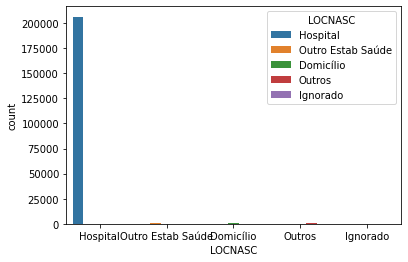

In [ ]:
#Local de nascimento
sns.countplot(x='LOCNASC', data=df_sinasc_19_rj, hue="LOCNASC")

In [ ]:
#Idade da mãe
df_sinasc_19_rj.IDADEMAE.describe()

count    207989.000000
mean         27.317671
std           6.852959
min          10.000000
25%          22.000000
50%          27.000000
75%          32.000000
max          99.000000
Name: IDADEMAE, dtype: float64

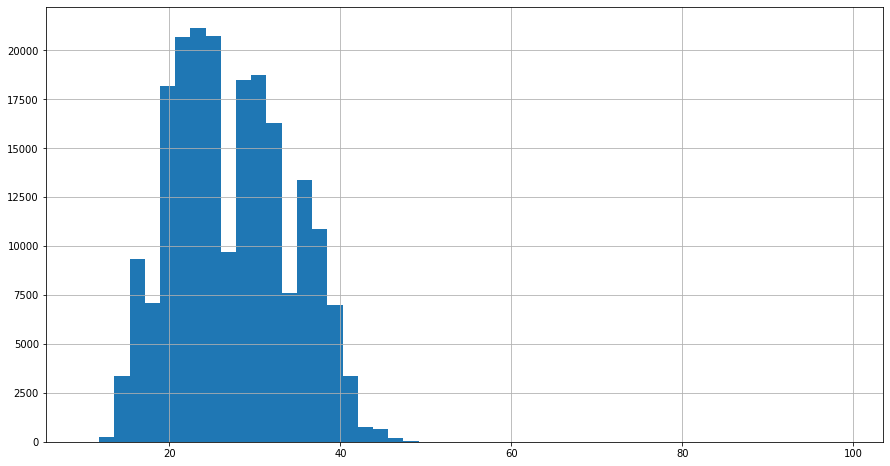

In [ ]:
df_sinasc_19_rj.IDADEMAE.hist(bins=50, figsize=(15,8))
plt.show()

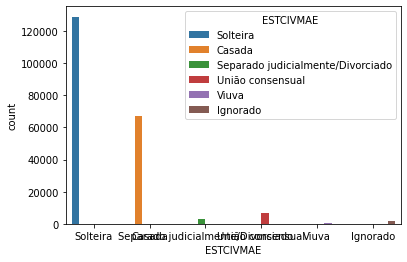

In [ ]:
#Estado civil da mãe
sns.countplot(x='ESTCIVMAE', data=df_sinasc_19_rj, hue="ESTCIVMAE")

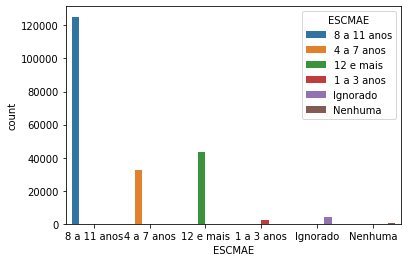

In [ ]:
#Escolaridade da mãe
sns.countplot(x='ESCMAE', data=df_sinasc_19_rj, hue="ESCMAE")

In [ ]:
#n de gestações anteriores
df_sinasc_19_rj.QTDGESTANT.describe()

count    206723.000000
mean          1.185204
std           1.488054
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          99.000000
Name: QTDGESTANT, dtype: float64

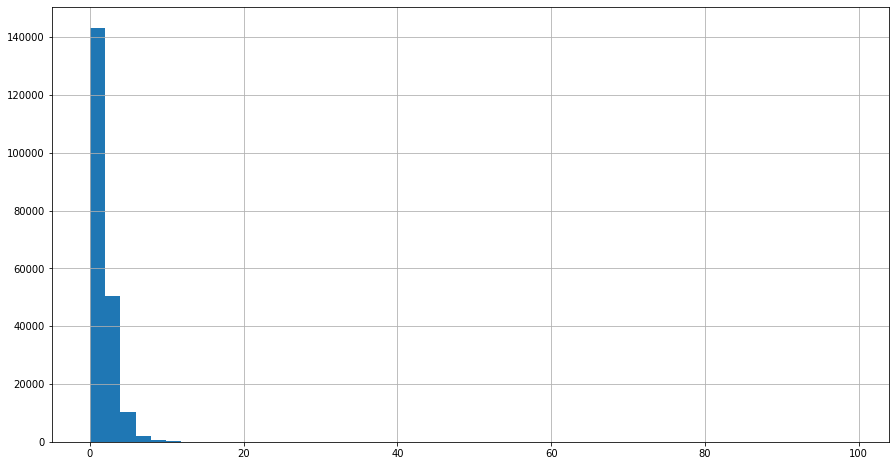

In [ ]:
df_sinasc_19_rj.QTDGESTANT.hist(bins=50, figsize=(15,8))
plt.show()

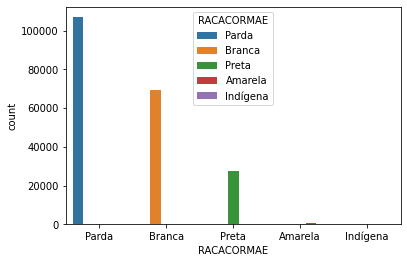

In [ ]:
#Raça/cor da mãe
sns.countplot(x='RACACORMAE', data=df_sinasc_19_rj, hue="RACACORMAE")

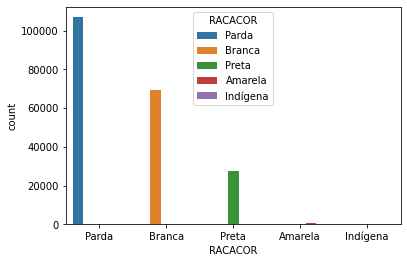

In [ ]:
#Raça/cor do nascido vivo
sns.countplot(x='RACACOR', data=df_sinasc_19_rj, hue="RACACOR")

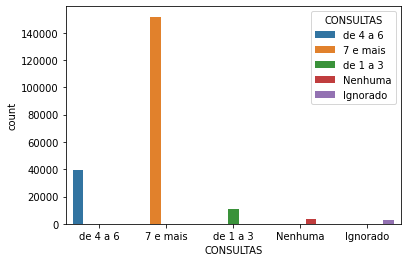

In [ ]:
#n de consultas pré-natal
sns.countplot(x='CONSULTAS', data=df_sinasc_19_rj, hue="CONSULTAS")

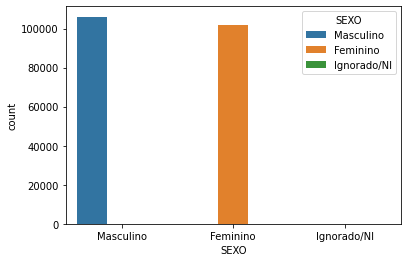

In [ ]:
#sexo do nascido vivo
sns.countplot(x='SEXO', data=df_sinasc_19_rj, hue="SEXO")

In [ ]:
df_sinasc_19_rj.PESO.describe()

count    207984.000000
mean       3169.207516
std         574.538164
min         100.000000
25%        2885.000000
50%        3205.000000
75%        3520.000000
max        7000.000000
Name: PESO, dtype: float64

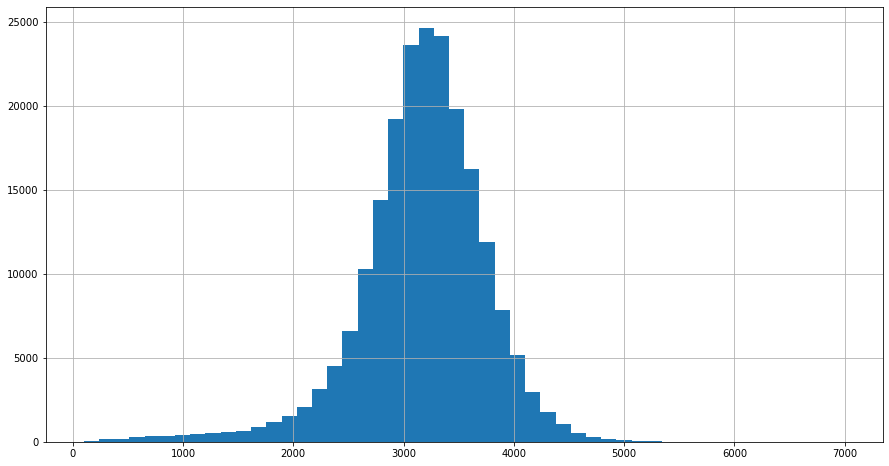

In [ ]:
df_sinasc_19_rj.PESO.hist(bins=50, figsize=(15,8))
plt.show()

In [ ]:
#Número de semanas de gestação
df_sinasc_19_rj.SEMAGESTAC.describe()

count    205678.000000
mean         38.415747
std           2.167573
min          19.000000
25%          38.000000
50%          39.000000
75%          40.000000
max          45.000000
Name: SEMAGESTAC, dtype: float64

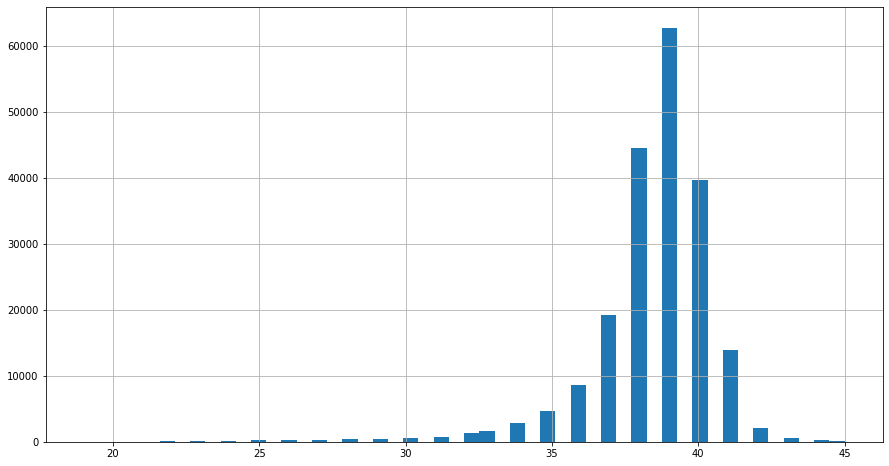

In [ ]:
df_sinasc_19_rj.SEMAGESTAC.hist(bins=50, figsize=(15,8))
plt.show()

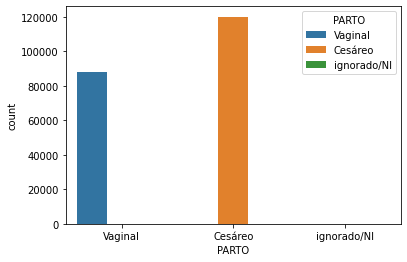

In [ ]:
#Tipo de parto
sns.countplot(x='PARTO', data=df_sinasc_19_rj, hue="PARTO")

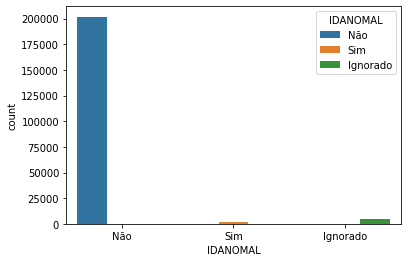

In [ ]:
#Identificação de Anomalia congênita
sns.countplot(x='IDANOMAL', data=df_sinasc_19_rj, hue="IDANOMAL")

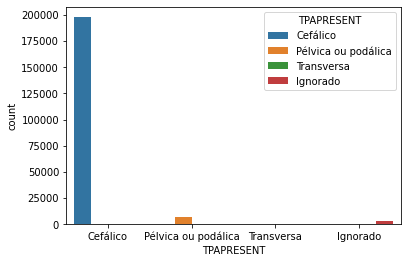

In [ ]:
#Tipo de apresentação do NV
sns.countplot(x='TPAPRESENT', data=df_sinasc_19_rj, hue="TPAPRESENT")

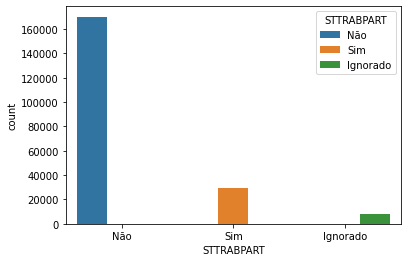

In [ ]:
#Trabalho de parto induzido?
sns.countplot(x='STTRABPART', data=df_sinasc_19_rj, hue="STTRABPART")

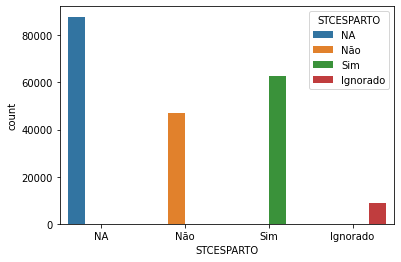

In [ ]:
#Cesárea ocorreu antes do trabalho de parto iniciar?
sns.countplot(x='STCESPARTO', data=df_sinasc_19_rj, hue="STCESPARTO")

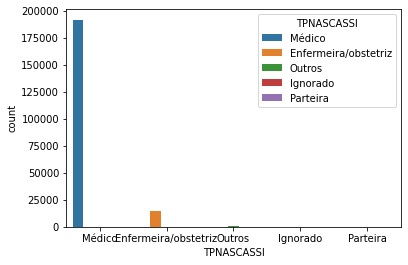

In [ ]:
#Profissional de saúde que assistiu o parto
sns.countplot(x='TPNASCASSI', data=df_sinasc_19_rj, hue="TPNASCASSI")

In [ ]:
#Classificação do recém-nascido segundo os marcadores de gravidade neonatal 

CLASSA = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] < 7) & (df_sinasc_19_rj["PESO"] < 1500) ]
CLASSB = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] >= 7) & (df_sinasc_19_rj["PESO"] < 1500) ]
CLASSC = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] < 7) & (df_sinasc_19_rj["PESO"] >= 1500) & (df_sinasc_19_rj["PESO"] <1700) ]
CLASSD = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] >= 7) & (df_sinasc_19_rj["PESO"] >= 1500) & (df_sinasc_19_rj["PESO"] <1700) ]
CLASSE = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] < 7) & (df_sinasc_19_rj["PESO"] >= 1750) & (df_sinasc_19_rj["PESO"] <2499) ]
CLASSF = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] >= 7) & (df_sinasc_19_rj["PESO"] >= 1750) & (df_sinasc_19_rj["PESO"] <2499) ]
CLASSG = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] < 7) & (df_sinasc_19_rj["PESO"] >= 2500) ]
CLASSH = df_sinasc_19_rj[ (df_sinasc_19_rj["APGAR5"] >= 7) & (df_sinasc_19_rj["PESO"] >= 2500)]

print("""
Classificação de gravidade A - Muito baixo peso e asfixia  {}
Classificação de gravidade B - Muito baixo peso {}
Classificação de gravidade C - Baixo peso e asfixia {}
Classificação de gravidade D - Baixo peso {}
Classificação de gravidade E - Baixo peso moderado e asfixia {}
Classificação de gravidade F - Baixo peso moderado {}
Classificação de gravidade G - Asfixia {}
Classificação de gravidade H - Sem marcador de gravidade {}""".format(
CLASSA.shape,
CLASSB.shape,
CLASSC.shape,
CLASSD.shape,
CLASSE.shape,
CLASSF.shape,
CLASSG.shape,
CLASSH.shape)
)


Classificação de gravidade A - Muito baixo peso e asfixia  (683, 47)
Classificação de gravidade B - Muito baixo peso (2615, 47)
Classificação de gravidade C - Baixo peso e asfixia (62, 47)
Classificação de gravidade D - Baixo peso (983, 47)
Classificação de gravidade E - Baixo peso moderado e asfixia (286, 47)
Classificação de gravidade F - Baixo peso moderado (14104, 47)
Classificação de gravidade G - Asfixia (1149, 47)
Classificação de gravidade H - Sem marcador de gravidade (186129, 47)
